In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

Data types in 'indu' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


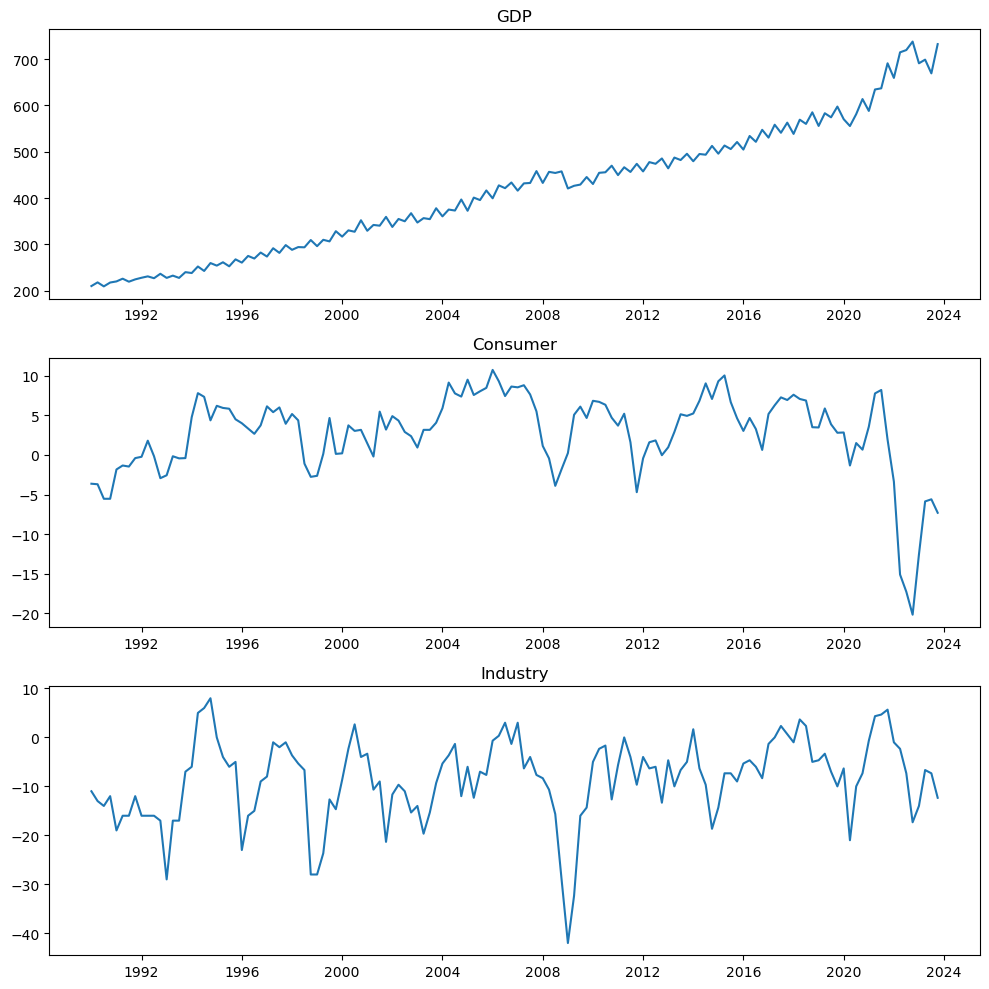

In [2]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

In [3]:
#Using the period 1990-2015 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [4]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
99  2014-10-01  512.7
100 2015-01-01  495.9
101 2015-04-01  513.5
102 2015-07-01  505.9
103 2015-10-01  521.1

[104 rows x 2 columns]
         Value       Time
0    -3.633333 1990-01-01
1    -3.700000 1990-04-01
2    -5.533333 1990-07-01
3    -5.533333 1990-10-01
4    -1.833333 1991-01-01
..         ...        ...
99    7.066667 2014-10-01
100   9.300000 2015-01-01
101  10.033333 2015-04-01
102   6.666667 2015-07-01
103   4.633333 2015-10-01

[104 rows x 2 columns]
         Value       Time
0   -11.000000 1990-01-01
1   -13.000000 1990-04-01
2   -14.000000 1990-07-01
3   -12.000000 1990-10-01
4   -19.000000 1991-01-01
..         ...        ...
99  -18.666667 2014-10-01
100 -14.333333 2015-01-01
101  -7.333333 2015-04-01
102  -7.333333 2015-07-01
103  -9.000000 2015-10-01

[104 rows x 2 columns]


In [5]:
#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train, cons_train], axis=1)

#Remove the Time column
exog.drop('Time', axis=1, inplace=True)

#Fit auto_arima function to the data
arimax_model = auto_arima(gdp_train['Value'], exogenous=exog, 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, 
                          m=4, seasonal=True,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the model
arimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[4] intercept   : AIC=630.755, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=736.197, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=633.803, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=666.181, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=828.733, Time=0.00 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=629.676, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=656.893, Time=0.05 sec
 ARIMA(1,0,1)(0,1,2)[4] intercept   : AIC=630.734, Time=0.17 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=634.879, Time=0.08 sec
 ARIMA(1,0,1)(1,1,2)[4] intercept   : AIC=631.461, Time=0.38 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=628.732, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=661.275, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=629.443, Time=0.09 sec
 ARIMA(1,0,0)(0,1,2)[4] intercept   : AIC=629.492, Time=0.12 sec
 ARIMA(1,0,0)(1,1,2)[4] intercept   : AIC=631.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  104
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                -310.366
Date:                             Tue, 09 Apr 2024   AIC                            628.732
Time:                                     12:56:51   BIC                            639.152
Sample:                                          0   HQIC                           632.949
                                             - 104                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0948      0.670      3.128      0.002       0.782       3.408
ar.L1          0.8222      0.052     15.782      0.000       0.720       0.924
ma.S.L4       -0.5982      0.079     -7.561      0.000      -0.753      -0.443
sigma2        28.4124      3.331      8.528      0.000      21.883      34.942
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                17.98
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.56
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

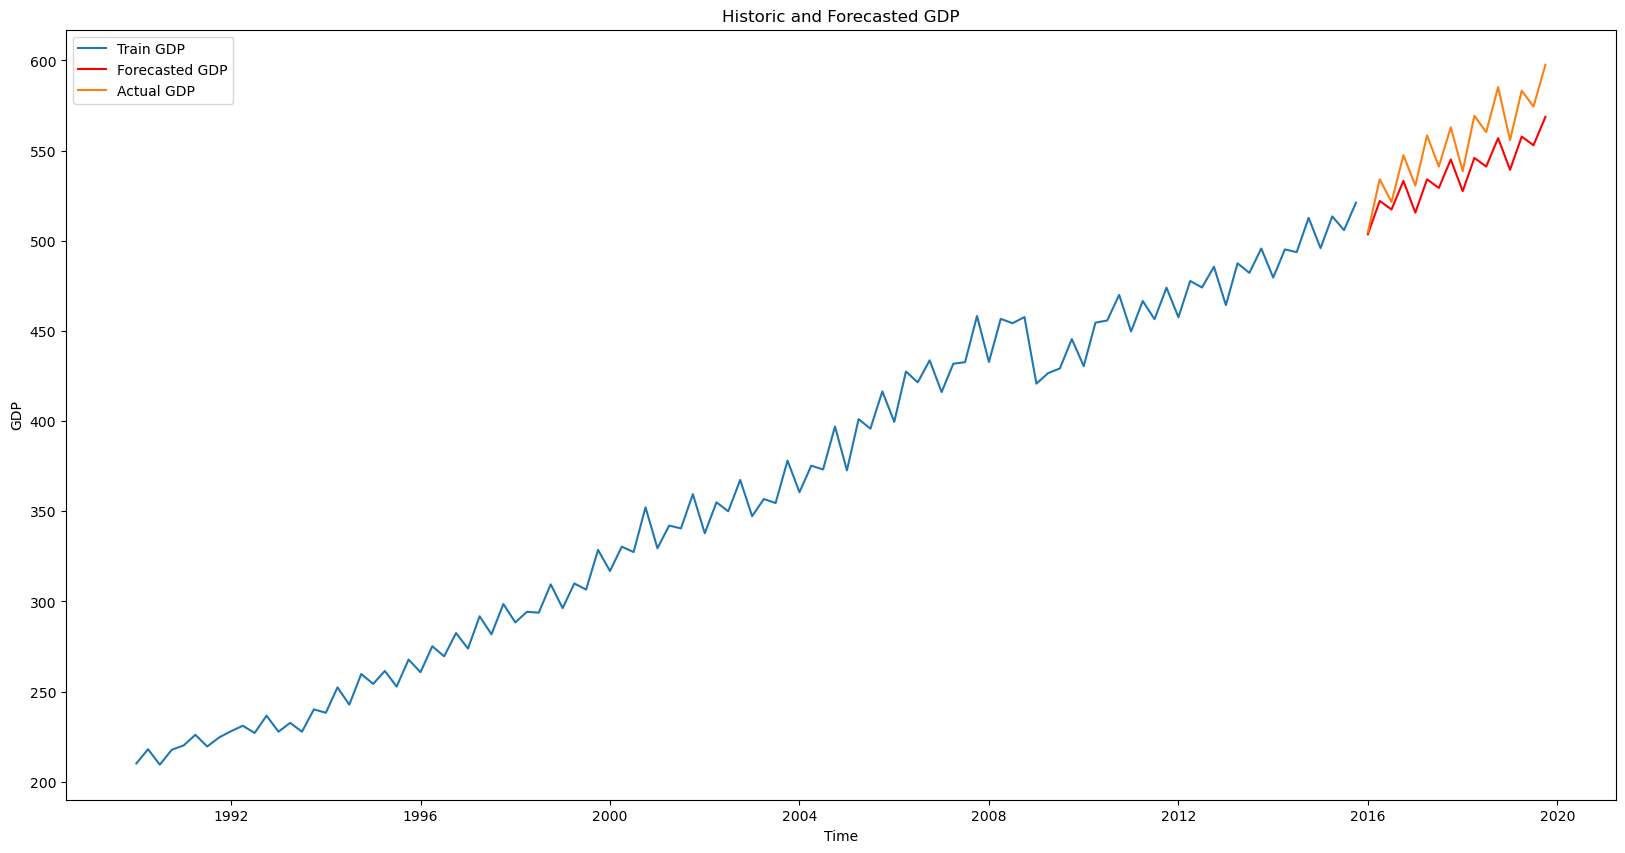

In [6]:
# Forecast 16 quarters ahead based on test indu and cons
exog_test = pd.concat([indu_test, cons_test], axis=1)

# Remove the Time column
exog_test.drop('Time', axis=1, inplace=True)

# Forecast the GDP values
forecast = arimax_model.predict(n_periods=16, exogenous=exog_test)

# Get the forecasted values
forecast_values = forecast.tolist()

# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(gdp_test['Time'], forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [7]:
#Comparing the forecasted values with the actual values trough RMSE and MAPE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)
#Calculate the MAPE
mape_value = mean_absolute_percentage_error(gdp_test['Value'], forecast_values) * 100 #Multiplying by 100 to get the percentage

# Print the RMSE
print("The RMSE is", rmse_value)
# Print the MAPE
print("The MAPE is", mape_value)

#The RMSE is 19. This is a good result, as the GDP is a very volatile variable.
#The MAPE is 3%.

The RMSE is 18.85148651337864
The MAPE is 3.0447476146045434
